In [1]:
import pandas as pd

In [2]:
import ipywidgets as widgets

In [3]:
print(widgets.__version__)

7.7.2


In [4]:
w = widgets.IntSlider()

In [5]:
from IPython.display import display

In [6]:
display(w)

IntSlider(value=0)

In [7]:
w.value

0

In [8]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [9]:
w.step

1

In [10]:
widgets.IntSlider(step=2)

IntSlider(value=0, step=2)

## Example using interact

Loading a dataset with seaborn and interacting with a widget

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
cars = sns.load_dataset('mpg')

(0.0, 0.03)

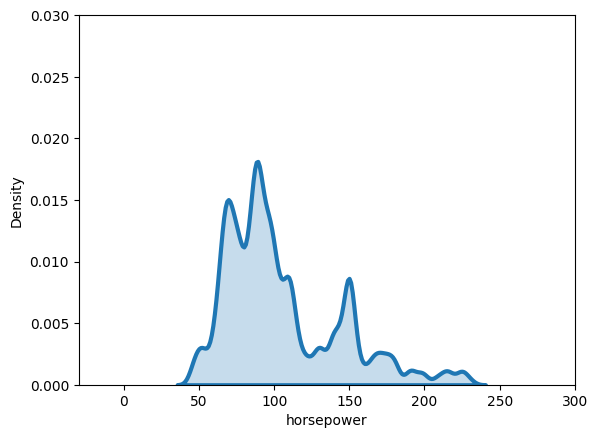

In [13]:
sns.kdeplot(cars.horsepower, lw=3, fill=True,bw_adjust=0.3)
plt.xlim(-30,300)
plt.ylim(0,0.03)

In [14]:
def bandwidth_widget (bw=1):
    sns.kdeplot(cars.horsepower, lw=3, fill=True,bw_adjust=bw)
    plt.xlim(-30,300)
    plt.ylim(0,0.03)

In [15]:
widgets.interact(bandwidth_widget,bw=(0.1,5))

interactive(children=(FloatSlider(value=1.0, description='bw', max=5.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.bandwidth_widget(bw=1)>

## Explaining Interact

We can import numpy to create series that we also can plot using pyplot afterwards.

In [16]:
import numpy as np

In [17]:
x = np.random.uniform(0,5, size=100)

In [18]:
ep= np.random.normal(size=100)

In [19]:
y = 2*x +ep

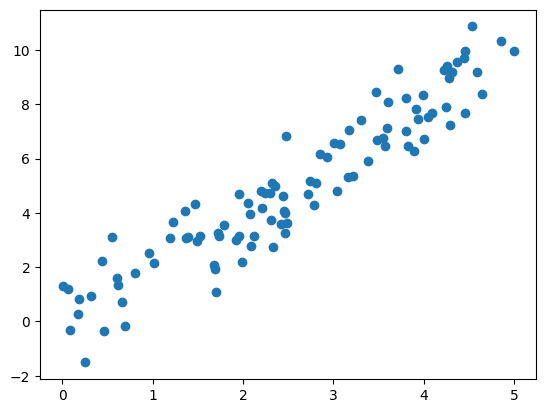

In [20]:
plt.scatter(x,y)

In [21]:
x_values= np.linspace(0,5,1000)

In [22]:
def slope_plot(m=1):
    plt.scatter(x,y)
    plt.plot(x_values,m*x_values,lw=3,color='black')
    plt.ylim(-1.2,12.2)

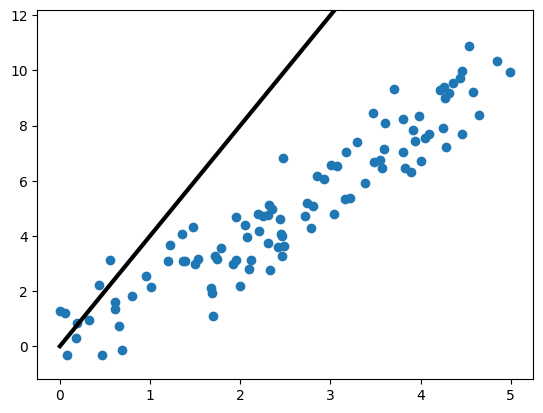

In [23]:
slope_plot(m=4)

In [24]:
widgets.interact(slope_plot,m=(0.2,5,0.2))

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), Output()), _dom_cla…

<function __main__.slope_plot(m=1)>

In [25]:
widgets.interact(slope_plot, m=[0,1,2,3,4])

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Output()), _dom_cl…

<function __main__.slope_plot(m=1)>

In [44]:

def slope_plot_line( m=1, text='',line=False):
    plt.scatter(x,y)
    if line:
        plt.plot(x_values,m*x_values,lw=3,color='black')
    if text:
        plt.text(0,10,f"{text} Slope is {m} ")
    plt.show()

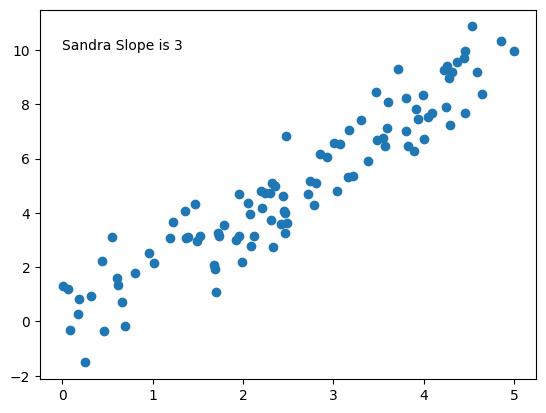

In [45]:
slope_plot_line(m=3, text="Sandra")

In [46]:
widgets.interact(slope_plot_line, m=[0,1,2,3,4],text='Soy yo')

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Text(value='Soy yo…

<function __main__.slope_plot_line(m=1, text='', line=False)>

In [40]:
plot_with_line = widgets.interactive(slope_plot_line, m=[0,1,2,3,4],text="Sandra",line=True);

In [41]:
display(plot_with_line)

interactive(children=(Dropdown(description='m', index=1, options=(0, 1, 2, 3, 4), value=1), Text(value='Sandra…

## Custom controls in iPywidgets

We can create a control that can contain the properties of a given parameter ( in this case options) to be passed to the interact function.

In [49]:
radio_buttons = widgets.RadioButtons ( 
 options = [0,1,2,3,4] ,
 value=1,
 description="Slope:")

In [50]:
widgets.interact(slope_plot_line, m=radio_buttons)

interactive(children=(RadioButtons(description='Slope:', index=1, options=(0, 1, 2, 3, 4), value=1), Text(valu…

<function __main__.slope_plot_line(m=1, text='', line=False)>

## Handling events from ipywidgets

We can connect 2 widgets by a function ( handler ), using the observe function. 
The observer function takes a function and a value. 
The handler function will have to use 2 variables and uses one parameter to take the change event.
The second parameter for the observe function is the attribute on the widget that the function should observe. In this case, the 'value' attribute. So when the value changes, the handler will take effect.

In [56]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

In [59]:
caption2 = widgets.Label(value='The values of checked are synchronized')
check = widgets.Checkbox(True, description="checked")

def handle_check_change(change):
    caption2.value = 'The check value is ' + (
        'true' if change.new else 'false'
    )

check.observe(handle_check_change, names='value')

display(caption2, check)

Label(value='The values of checked are synchronized')

Checkbox(value=True, description='checked')

## Animations with iPywidgets

In [65]:
z = np.linspace(0,2*np.pi, 1000)

In [72]:
def sine_wave(t=0):
    y=np.sin(z+0.1*t)
    plt.plot(z,y)

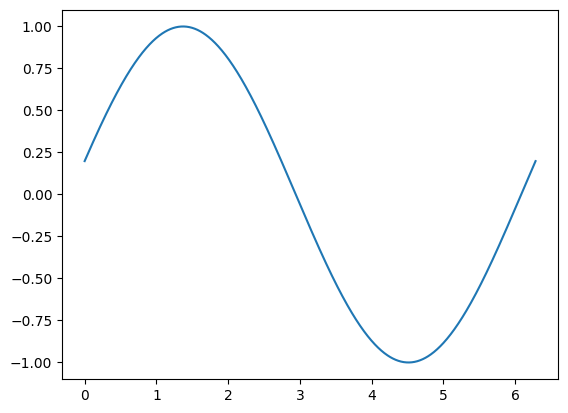

In [73]:
sine_wave(t=2)

In [74]:
widgets.interact(sine_wave,t=(0,20,1))

interactive(children=(IntSlider(value=0, description='t', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.sine_wave(t=0)>

In [75]:
widgets.interact(sine_wave, t = widgets.Play(min=0, max=20))

interactive(children=(Play(value=0, description='t', max=20), Output()), _dom_classes=('widget-interact',))

<function __main__.sine_wave(t=0)>

In [76]:
def sine_wave_with_freq(t=0, freq=1):
    y=np.sin(freq*(z+0.1*t))
    plt.plot(z,y)
    
    plt.xlim(0,2*np.pi)
    plt.ylim(-1.5,1.5)

In [77]:
widgets.interact(sine_wave_with_freq, t=widgets.Play(min=0, max=20),freq=(1,5,0.5))

interactive(children=(Play(value=0, description='t', max=20), FloatSlider(value=1.0, description='freq', max=5…

<function __main__.sine_wave_with_freq(t=0, freq=1)>